# K-Means 군집

In [131]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans # sklearn.cluster 패키지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [132]:
# K-Means 군집에서는 클러스터의 개수를 미리 알고 있는 것이 좋음: 기본적으로 K-means는 이상치가 있는 없든 모든 데이터를 군집화 하는 것이 목적이기 때문

# K-Means 군집 분석에서 클러스터의 개수를 미리 알고 있는 것이 좋은 이유는 여러 가지가 있습니다. K-Means 알고리즘은 미리 정해진 클러스터 수(k)에 따라 데이터를 군집화하기 때문에, 적절한 클러스터 수를 선택하는 것이 매우 중요합니다. 올바른 클러스터 수를 선택하면 분석 결과의 품질과 해석 가능성을 높일 수 있습니다.

    # 이유
# 적절한 군집화 결과 도출:
# 클러스터의 개수를 미리 알고 있으면, 데이터를 더 의미 있게 군집화할 수 있습니다. 올바른 클러스터 수를 선택하면 각 클러스터가 실제로 데이터의 패턴을 반영할 가능성이 높습니다.

# 오버피팅과 언더피팅 방지:
# 너무 많은 클러스터를 설정하면 과적합(overfitting)이 발생할 수 있으며, 데이터의 잡음을 과도하게 반영할 수 있습니다.
# 반대로 너무 적은 클러스터를 설정하면 과소적합(underfitting)이 발생하여, 데이터의 중요한 구조를 놓칠 수 있습니다.

# 해석 가능성 향상:
# 클러스터의 개수를 알고 있으면 결과를 더 쉽게 해석할 수 있습니다. 각 클러스터가 어떤 의미를 갖는지 명확히 이해할 수 있으며, 이를 통해 인사이트를 도출하기가 쉬워집니다.

# 성능 최적화:
# 클러스터의 개수를 미리 알고 있으면 알고리즘의 성능을 최적화할 수 있습니다. K-Means 알고리즘은 초기 클러스터 중심점을 설정하고 반복적으로 계산하기 때문에, 클러스터 수가 최적화되면 계산 효율성도 높아집니다.






# iris 데이터 프레임에서는 꽃의 종류가 세 종류니까 군집도 세 종류로 해볼까?
n_clusters = 3

# centroid는 처음에 무작위로 생성
kmeans = KMeans(n_clusters= n_clusters, max_iter= 300, random_state= 0)
kmeans.fit(irisDF)


/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

## KMeans 군집의 속성(Property) 확인
훈련이 끝난 KMeans 군집 객체에서는 클러스터를 확인 할 수 있다.
- `labels_` : 훈련된(`fit`) 데이터에 대한 군집 레이블을 확인
 - 지도학습에서 사용하는 `label`과는 다릅니다~!
 - 랜덤하게 `label`이 부여된다. 따라서 사람이 해석

In [133]:
kmeans.labels_

# 앞이 지금 1번으로 채워져 있는 것을 통해 1번 자리에 있던 숫자는 원래 0번 자리였다는 것을 알 수 있음

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [134]:
# predict를 사용 가능. 어떤 데이터 포인트가 들어 왔을 때 이 데이터 포인트가 어떤 군집인지 확인

kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [135]:
# 무작위로 꽃을 만들어서 어떤 클러스터에 속할까? 를 확인
test_iris = np.array([[6.1, 2.5, 3.4, 1.2],
                        [3.8, 4.0, 3.1, 3.3]])

# predict: 어떤 클러스터에 속할지를 확인
kmeans.predict(test_iris)

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int32)

In [136]:
#kmeans에는 fit_predict가 있다. (test 데이터로는 fit_predict 하면 안된다. train 데이터로만!!)

kmeans.fit_predict(irisDF)

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 각 데이터 포인트의 군집상의 좌표

In [137]:
kmeans.transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

## 실제 타겟과 군집의 차이를 비교

In [138]:
iris.target, kmeans.labels_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

In [139]:
# 타겟값을 잘 따라 갔는지 확인

irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [140]:
# 타겟과 클러스터의 개수를 각각 확인
irisDF.groupby(['target', 'cluster']).count()


# 타겟은 0번이었는데 1번 군집에 있는 건 50개로 잘 들어감

# 원래 클래스가 0번이었던 꽃은 2번(2송이)과 섞여있음
# 마찬가지로 클래스가 2번이었던 꽃은 0번(14송이)과 섞여있음

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

In [141]:
# 데이터를 PCA 통해 차원 축소를 수해한 후 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['c1'] = pca_transformed[:, 0]
irisDF['c2'] = pca_transformed[:, 1]

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,c1,c2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


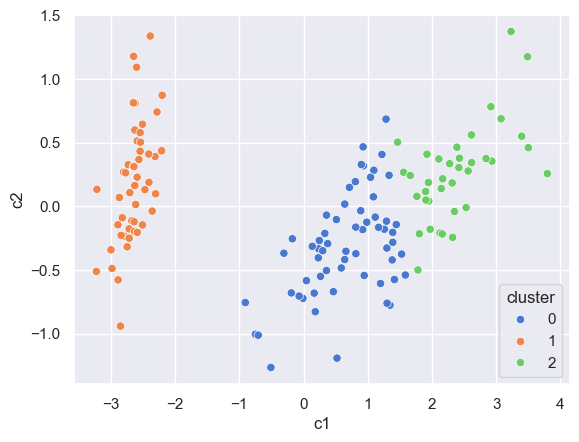

In [142]:
import seaborn as sns

# 각 컴포넌트 별 군집 확인
sns.scatterplot(
    x='c1',
    y='c2',
    hue='cluster',
    palette='muted',
    data=irisDF
)

plt.show()

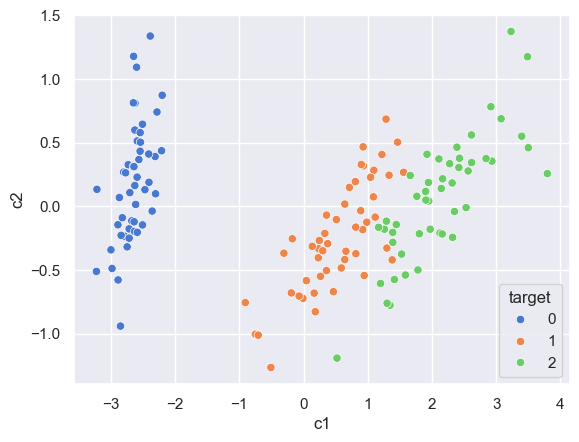

In [143]:
sns.scatterplot(
    x='c1',
    y='c2',
    hue='target',
    palette='muted',
    data=irisDF
)

plt.show()

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [145]:
import pandas as pd

clusterDF = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)
clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


# 임의 데이터 세트 확인

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [147]:
import pandas as pd

clusterDF = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)
clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


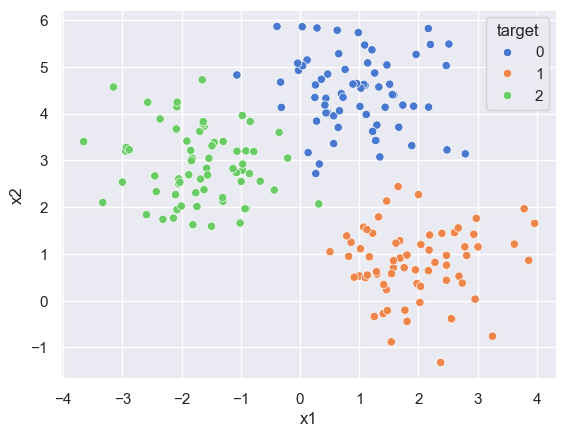

In [148]:
sns.scatterplot(
    x='x1',
    y='x2',
    hue='target',
    palette='muted',
    data=clusterDF
)

plt.show()

In [149]:
# KMeans 모델 생성
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

# 데이터에 대해 모델 학습 및 클러스터 예측
cluster_labels = kmeans.fit_predict(X)
cluster_labels


array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0], dtype=int32)

In [150]:
clusterDF['cluster'] = cluster_labels
clusterDF.head()

,x1,x2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [151]:
centers = kmeans.cluster_centers_
centers

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

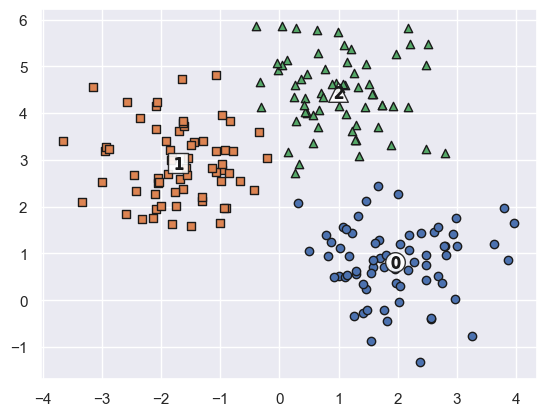

In [152]:
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['cluster']==label]
    plt.scatter(x=label_cluster['x1'], y=label_cluster['x2'], edgecolor='k',
                marker=markers[label] )

    center_x_y = centers[label]

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()


# MeanShift 군집

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/3874437502.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

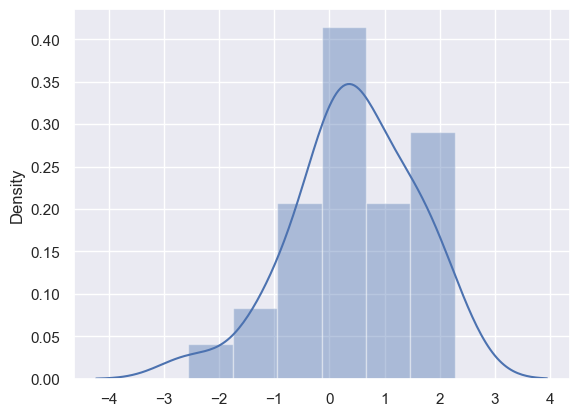

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 30개의 랜덤 데이터를 정규분포로 생성

sns.distplot(x)

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/3522087870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug=True)


<Axes: ylabel='Density'>

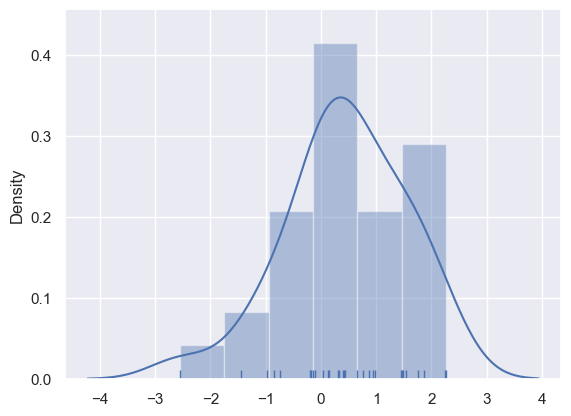

In [154]:
# rug 옵션을 이용해서 데이터의 밀집 상황 확인

sns.distplot(x, rug=True)

## 각각의 데이터 포인트 마다 커널함수 적용

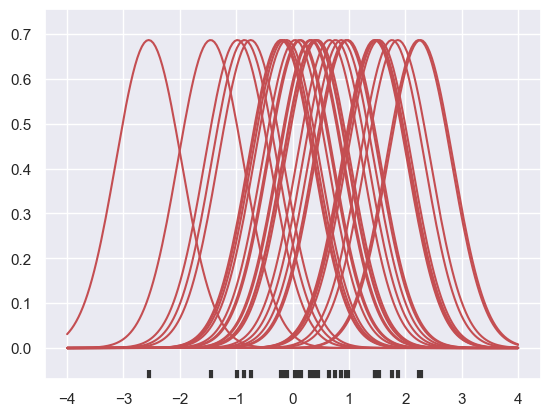

In [155]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

# 각각의 커널 만들기
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")


sns.rugplot(x, color=".2", linewidth=3);

In [156]:
len(kernels), len(kernels[0])

(30, 200)

In [157]:
density = np.sum(kernels, axis=0)
density.shape

(200,)

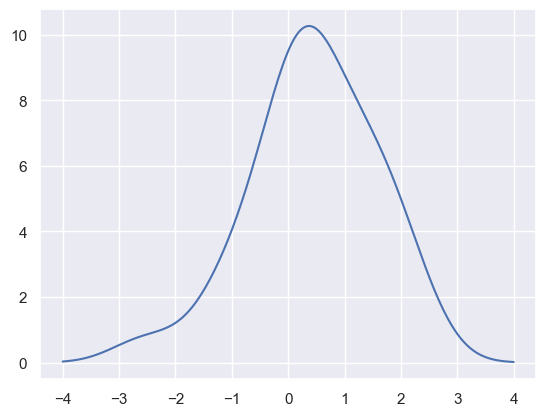

In [158]:
plt.plot(support, density)

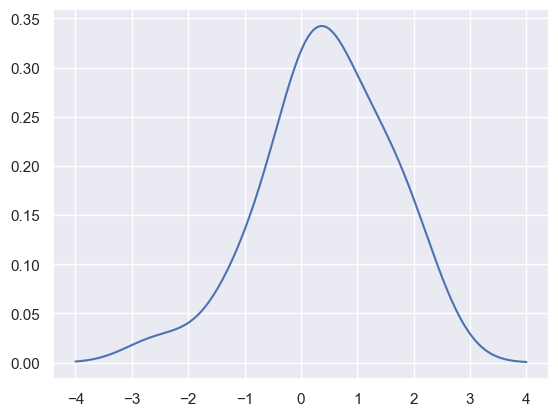

In [159]:
from scipy.integrate import trapz # 각 구간별 y에 대한 적분

density /= trapz(density, support)
plt.plot(support, density)

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/3029249095.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade=True)


<Axes: ylabel='Density'>

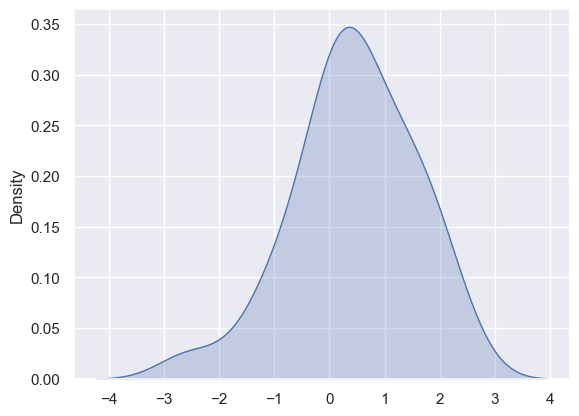

In [160]:
sns.kdeplot(x, shade=True)

/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/227318976.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x, bw=0.2, label='bw : 0.2')
/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/227318976.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2.0`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x, bw=2.0, label='bw : 2.0')


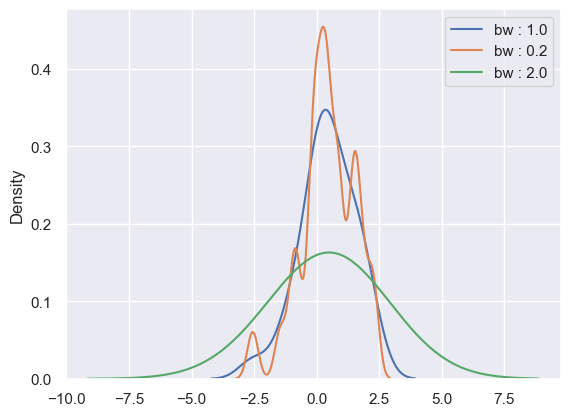

In [161]:
sns.kdeplot(x, label='bw : 1.0')
sns.kdeplot(x, bw=0.2, label='bw : 0.2')
sns.kdeplot(x, bw=2.0, label='bw : 2.0')

# bw = bandwitdth
# bw가 작아질수록 봉우리가 많은 그래프로 나타난다

plt.legend()
plt.show()

## MeanShift 군집 사용하기

In [162]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

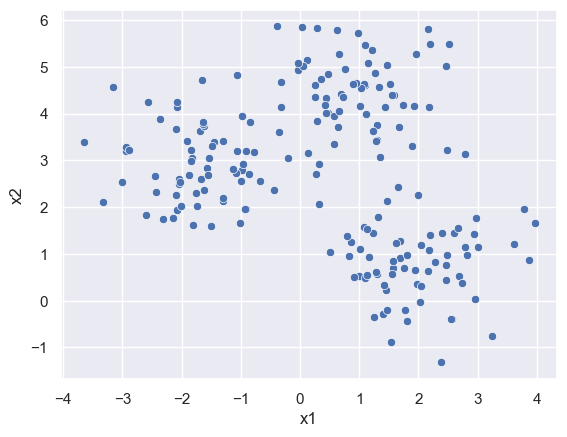

In [163]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)
sns.set_theme()
sns.scatterplot(
    x='x1',
    y='x2',
    data=sample_data_df
)
plt.show()

In [164]:
from sklearn.cluster import MeanShift

# bandwidth가 작으면 오밀조밀하게 모여있는 데이터를 하나의 군집으로 삼는다
# 즉 군집이 많아지게 된다

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

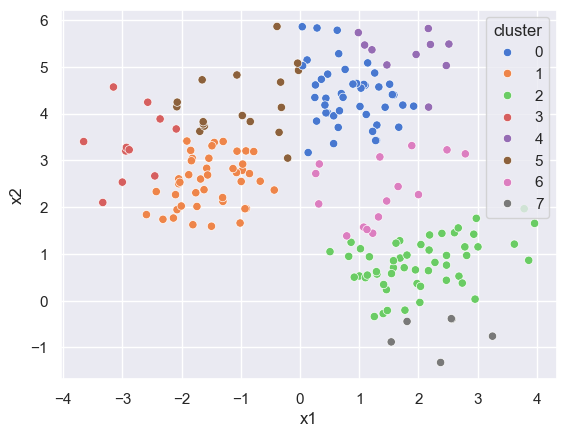

In [165]:
import pandas as pd

sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels
sns.set_theme()
sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [166]:
# bandwidth 증가 
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2])

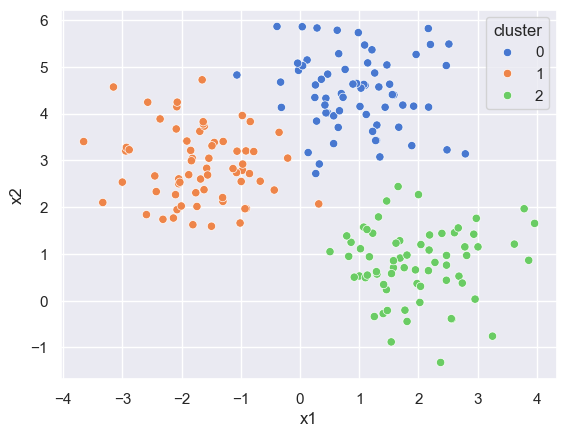

In [167]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

최적의 bandwidth 구하기.
- 일단 이 방법으로 군집을 수행하면서 중간 중간에 시각화 등으로 확인 하면서 bandwidth를 조절

In [168]:
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25)
best_bandwidth

1.6889636737559222

In [169]:
# 최적의 bandwidth로 군집을 수행
meanshift = MeanShift(bandwidth=best_bandwidth)

In [170]:
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2])

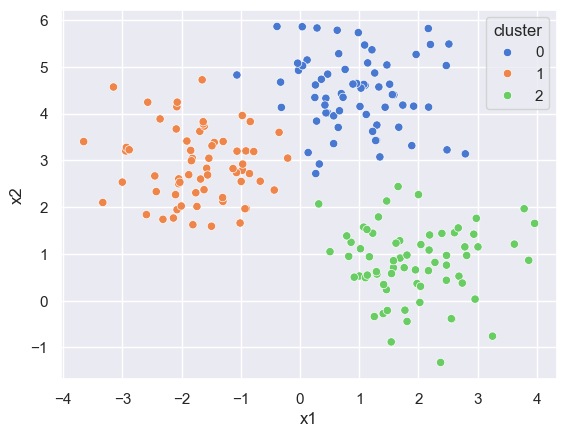

In [171]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [172]:
# MeanShift도 centroid 존재
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

# GMM 군집 사용하기

In [173]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [174]:
from sklearn.mixture import GaussianMixture

# n_components: 정규분포의 개수 (군집의 개수)
gmm = GaussianMixture(n_components=3, random_state=0)

gmm_cluster_labels = gmm.fit_predict(iris.data)
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [175]:
irisDF.groupby(['target'])['gmm_cluster'].value_counts().to_frame()

gmm_cluster
target gmm_cluster             
0      1                     50
1      0                     45
       2                      5
2      2                     50

In [176]:
# kmeans?
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts().to_frame()
iris_result

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
target kmeans_cluster                
0      1                           50
1      0                           48
       2                            2
2      2                           36
       0                           14

In [177]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

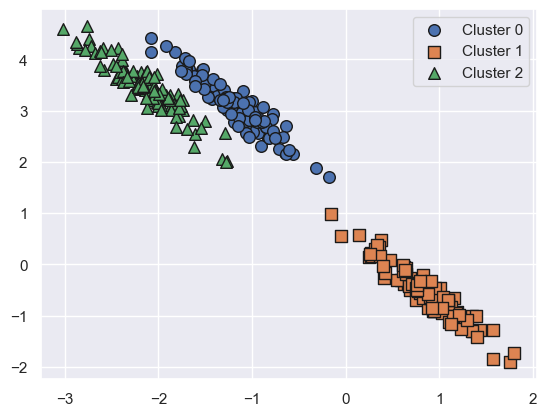

In [178]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341],
                [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/opt/anaconda3/envs/ml-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


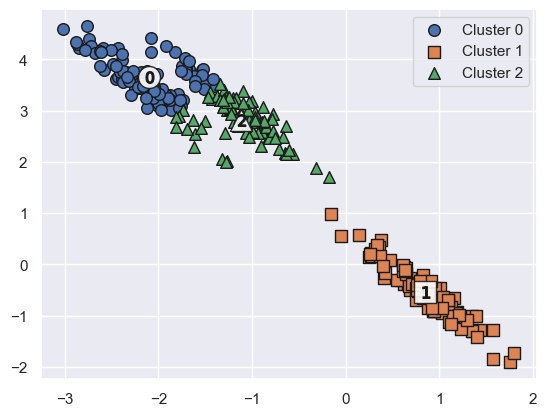

In [179]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

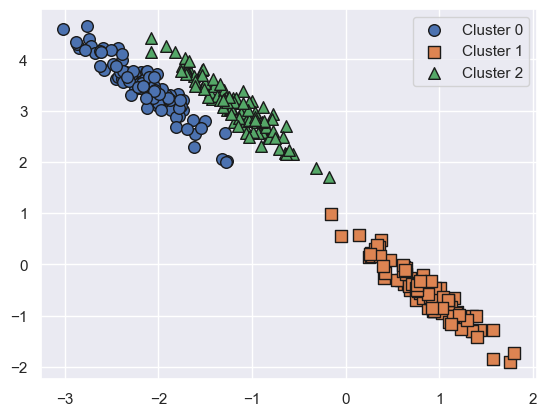

In [180]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

# DBSCAN 군집

In [190]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [191]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.6, 
    min_samples=8, 
    metric='euclidean'
    )

dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [186]:
irisDF.groupby(['target'])['dbscan_cluster'].value_counts().to_frame()

dbscan_cluster
target dbscan_cluster                
0       0                          49
       -1                           1
1       1                          46
       -1                           4
2       1                          42
       -1                           8

In [193]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

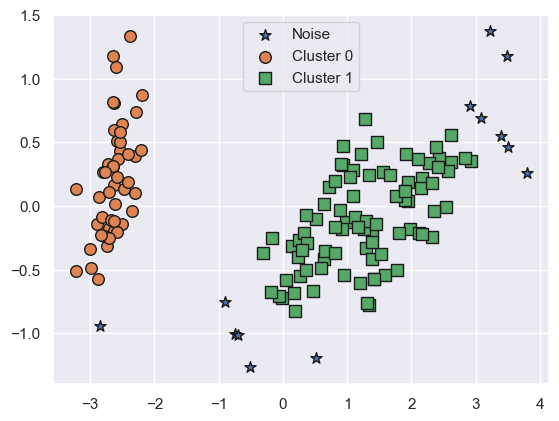

In [194]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

eps 늘려보기
- 한꺼번에 포함시키는 데이터 포인트의 범위가 커진다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


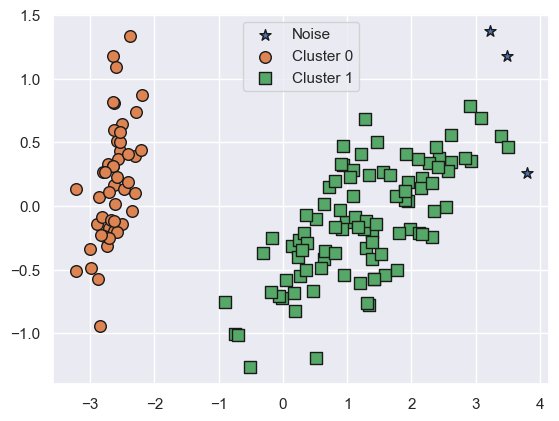

In [198]:
from sklearn.cluster import DBSCAN

# eps가 0.6에서 0.8로 늘어남.
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

min_samples 증가

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


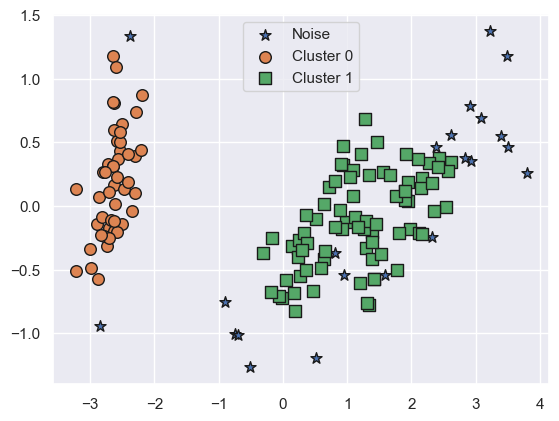

In [199]:
# min_samples를 8개에서 16개로 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

dbscan = DBSCAN(eps=0.4, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

eps, min_sample를 둘 다 줄인 경우

target  dbscan_cluster
0        0                47
        -1                 3
1        1                39
        -1                 4
         2                 4
         3                 3
2        3                35
        -1                15
Name: dbscan_cluster, dtype: int64


/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_10189/3718674915.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\


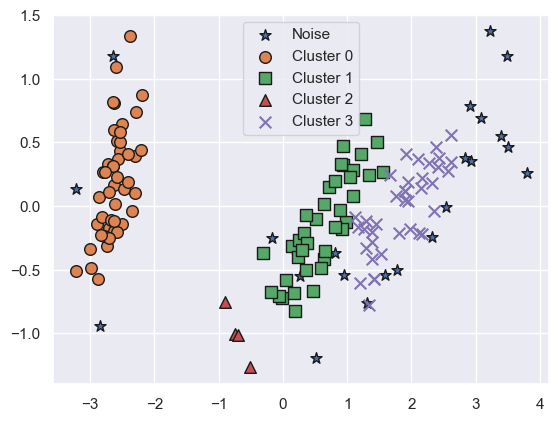

In [202]:
dbscan = DBSCAN(eps=0.4, min_samples=3, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)